In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from torchvision import datasets, transforms
import torch 

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5, )), ])

train = datasets.MNIST('MNIST/data', train=True, download=True, transform=transform)
training_data = torch.utils.data.DataLoader(train, shuffle=True, batch_size=64)
test = datasets.MNIST('MNIST/data', train=False, download=True, transform=transform)
testing_data = torch.utils.data.DataLoader(test, batch_size=64)



In [3]:
import torch.nn as nn 

input_size = 784
hidden_size = [128, 64]
output_size = 10 

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      # nn.Softmax(dim=1)
                      )

model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [4]:
criterion = nn.CrossEntropyLoss()

dataiter = iter(training_data)
images, labels = dataiter.next()
images = images.view(images.shape[0], -1)
output = model(images)
# print(output, labels[0])
# output = torch.argmax(output)
criterion(output, labels)


tensor(2.3108, grad_fn=<NllLossBackward>)

In [6]:
print('Before Backward pass : ')
print(model[0].weight.grad)
loss.backward()
print('After Backward pass : ')
print(model[0].weight.grad)

Before Backward pass : 
None
After Backward pass : 
tensor([[-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0033, -0.0033, -0.0033,  ..., -0.0033, -0.0033, -0.0033],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008]])


In [7]:
import torch.optim as optim

print('Initial weights  \n', model[0].weight)
optimizer = optim.SGD(model.parameters(), lr=0.01)

dataiter = iter(training_data)
images, labels = dataiter.next()
images = images.view(-1, 784)
output = model(images)

optimizer.zero_grad()
loss = criterion(output, labels)
loss.backward()
print(model[0].weight.grad)
optimizer.step()
print('Updated weights', model[0].weight)
print(loss)

Initial weights  
 Parameter containing:
tensor([[-0.0218,  0.0023, -0.0124,  ...,  0.0228, -0.0125, -0.0153],
        [-0.0250,  0.0156,  0.0321,  ..., -0.0309, -0.0015, -0.0351],
        [-0.0226, -0.0040, -0.0286,  ...,  0.0016,  0.0038,  0.0072],
        ...,
        [ 0.0352, -0.0330,  0.0059,  ...,  0.0088,  0.0069,  0.0159],
        [ 0.0045,  0.0220, -0.0298,  ...,  0.0079, -0.0035, -0.0345],
        [-0.0029,  0.0030,  0.0087,  ...,  0.0052,  0.0240,  0.0208]],
       requires_grad=True)
tensor([[ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0037,  0.0037,  0.0037,  ...,  0.0037,  0.0037,  0.0037],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014]])
Updated weights Parameter containing:
tensor([[-0.0218,  0.0023,

In [20]:
##TRAIN FOR REAL 
import torch.nn as nn 

input_size = 784
hidden_size = [128, 64]
output_size = 10 

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      nn.LogSoftmax(dim=1)
                      )

import torch.optim as optim 
from tqdm import tqdm 

optimizer = optim.SGD(model.parameters(), lr=0.003)
EPOCHS = 5
criterion = nn.NLLLoss()
for epoch in range(EPOCHS):
  total_loss = 0
  for images, labels in tqdm(training_data):
    images = images.view(-1, 784)
    outputs = model(images)
    optimizer.zero_grad()
    loss = criterion(outputs, labels)
    loss.backward()
    total_loss += loss.item()
    optimizer.step()
  print("Loss function epoch %d : %.4f" %(epoch+1, total_loss/len(training_data)))
    

  1%|          | 9/938 [00:00<00:10, 87.89it/s]

Loss function epoch 1 : 1.8470


  1%|          | 9/938 [00:00<00:11, 80.60it/s]

Loss function epoch 2 : 0.7828


  1%|          | 9/938 [00:00<00:11, 81.29it/s]

Loss function epoch 3 : 0.5042


  1%|          | 9/938 [00:00<00:10, 86.38it/s]

Loss function epoch 4 : 0.4216


100%|██████████| 938/938 [00:10<00:00, 91.67it/s]

Loss function epoch 5 : 0.3803


In [0]:
testiter = iter(testing_data)
images, labels = testiter.next()
images = images.view(-1, 784)
with torch.no_grad():
  output = model(images)

exp = torch.exp(output)
# print(exp)
# print(output.sum(dim=1))
# print(exp.sum(dim=1))

In [22]:
print(labels)
print(torch.argmax(exp, dim=1))

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 2])


In [26]:
correct = 0
total = 0
with torch.no_grad():
  for images, labels in testing_data:
    images = images.view(-1, 784)
    outputs = model(images)
    
    for i in range(len(labels)):
      if labels[i] == torch.argmax(torch.exp(outputs[i])):
        correct +=1
      total += 1

print("Accuracy : %.2f %%" %(100*correct/total))

Accuracy : 89.55 %


In [27]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

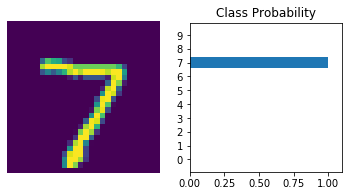

In [36]:
%matplotlib inline
import helper

images, labels = next(iter(testing_data))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)